In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the transactions data
file_path = r'C:\Users\Admin\OneDrive\Desktop\Python\Unigap\Final Project\Final_project_RFM\ecommerce retail.xlsx'  
transactions = pd.read_excel(file_path, sheet_name='ecommerce retail')

In [3]:
# View the first few rows
print(transactions.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
# Check data information
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [8]:
# Check descriptive statistics
print(transactions.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [9]:
# Check total null values
print(transactions.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
# Convert columns from object to string using .apply(str)
transactions['InvoiceNo'] = transactions['InvoiceNo'].apply(str)
transactions['StockCode'] = transactions['StockCode'].apply(str)
transactions['Description'] = transactions['Description'].apply(str)
transactions['Country'] = transactions['Country'].apply(str)
transactions['CustomerID'] = transactions['CustomerID'].apply(str)

# Check column data types again
print(transactions.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [11]:
# Drop inappropriate data values
## Drop rows with negative Quantity
transactions = transactions[transactions['Quantity'] > 0]
## Drop rows with negative UnitPrice
transactions = transactions[transactions['UnitPrice'] > 0]
## Drop cancelled data
transactions['check_cancel'] = transactions['InvoiceNo'].apply(lambda x: True if x[0] == 'C' else False)
transactions = transactions[transactions['check_cancel'] == False]
transactions = transactions.replace('nan', None)
transactions = transactions.replace('Nan', None)
transactions.shape

(530104, 9)

In [12]:
# Statistics for columns with missing values
missing_dict = {
    'volume': transactions.isnull().sum(),
    'percentage_missing': transactions.isnull().sum() / transactions.shape[0] * 100
}
missing_df = pd.DataFrame(missing_dict)
missing_df.head(10)

,volume,percentage_missing
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,24.942275
Country,0,0.000000
check_cancel,0,0.000000


In [15]:
# Drop 20% of users with missing values
transactions = transactions[transactions['CustomerID'].notnull()]
transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [5]:
# Total rows with missing values in CustomerID column
missing_customer_id_rows = transactions[transactions['CustomerID'].isnull()]
total_missing = len(missing_customer_id_rows)

# 20% of total missing values
num_to_drop = int(total_missing * 0.20)

# Randomly select 20% of missing values rows
rows_to_drop = missing_customer_id_rows.sample(num_to_drop, random_state=1)

# Drop selected rows
transactions = transactions.drop(rows_to_drop.index)

print(len(transactions))
print(transactions["CustomerID"].isnull().sum())

514893
108064


In [6]:
# Check duplicate value 
transactions_duplicated = transactions.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'])
print(transactions[transactions_duplicated].shape)
print('')
print(transactions.shape)

(10493, 8)

(514893, 8)


In [7]:
# Drop duplicate value
transactions_drop_duplicates = transactions.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], keep='first')
transactions_drop_duplicates.shape

(504400, 8)

Calucaltion RFM

In [ ]:
# Create RFM_transactions table
last_day = transactions['InvoiceDate'].max()
transactions['cost'] = transactions['Quantity'] * transactions['UnitPrice']
RFM_transactions = transactions.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (last_day - x.max()).days),
    Frequency=('CustomerID', 'count'),
    Monetery=('cost', 'sum')
).reset_index()
RFM_transactions.dtypes

CustomerID    float64
Recency         int64
Frequency       int64
Monetery      float64
dtype: object

In [8]:
RFM_transactions.head()

,CustomerID,Recency,Frequency,Monetery
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [11]:
# Create R, F, M columns:
RFM_transactions['R'] = pd.qcut(RFM_transactions['Recency'], 5, labels=range(1, 6)).astype(str)
RFM_transactions['F'] = pd.qcut(RFM_transactions['Frequency'], 5, labels=range(1, 6)).astype(str)
RFM_transactions['M'] = pd.qcut(RFM_transactions['Monetery'], 5, labels=range(1, 6)).astype(str)
RFM_transactions['RFM'] = RFM_transactions.apply(lambda x: x['R'] + x['F'] + x['M'], axis=1)
RFM_transactions.head()

,CustomerID,Recency,Frequency,Monetery,R,F,M,RFM
0,12346.0,325,2,0.00,5,1,1,511
1,12347.0,1,182,4310.00,1,5,5,155
2,12348.0,74,31,1797.24,4,3,4,434
3,12349.0,18,73,1757.55,2,4,4,244
4,12350.0,309,17,334.40,5,2,2,522


In [14]:
# Read segment data from Excel file
segments = pd.read_excel(file_path, sheet_name='Segmentation')
segments['RFM Score'] = segments['RFM Score'].str.split(',')
segments = segments.explode('RFM Score').reset_index(drop=True)

In [13]:
# Remove space of column 'RFM Score'
segments['RFM Score'] = segments['RFM Score'].apply(lambda x: x.replace(' ', ''))

In [14]:
# Merge proper segmentation
RFM_transactions_final = RFM_transactions.merge(segments, left_on='RFM', right_on='RFM Score', how='left')
RFM_transactions_final.head()

,CustomerID,Recency,Frequency,Monetery,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,2,0.00,5,1,1,511,New Customers,511
1,12347.0,1,182,4310.00,1,5,5,155,Cannot Lose Them,155
2,12348.0,74,31,1797.24,4,3,4,434,Need Attention,434
3,12349.0,18,73,1757.55,2,4,4,244,At Risk,244
4,12350.0,309,17,334.40,5,2,2,522,Promising,522


Visualize RFM

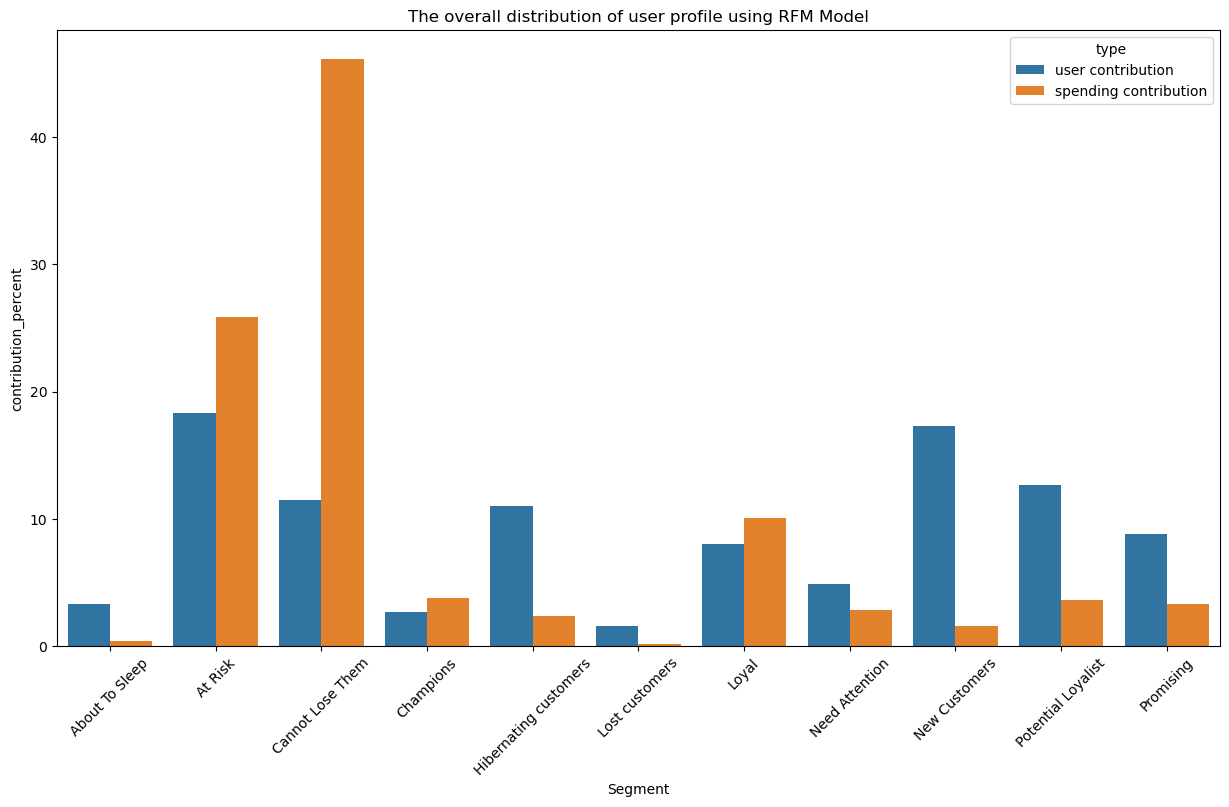

In [16]:

# Distribution of User profile
segment_by_user_count = RFM_transactions_final[['Segment', 'CustomerID']].groupby(['Segment']).count().reset_index().rename(columns={'CustomerID': 'user_volume'})
segment_by_user_count['contribution_percent'] = round(segment_by_user_count['user_volume'] / segment_by_user_count['user_volume'].sum() * 100, 2)
segment_by_user_count['type'] = 'user contribution'

segment_by_spending = RFM_transactions_final[['Segment', 'Monetery']].groupby(['Segment']).sum().reset_index().rename(columns={'Monetery': 'spending'})
segment_by_spending['contribution_percent'] = segment_by_spending['spending'] / segment_by_spending['spending'].sum() * 100
segment_by_spending['type'] = 'spending contribution'

segment_agg = pd.concat([segment_by_user_count, segment_by_spending])

# Visualize the distribution of User profile
plt.figure(figsize=(15, 8))
sns.barplot(data=segment_agg, x='Segment', y='contribution_percent', hue='type')
plt.title('The overall distribution of user profile using RFM Model')
plt.xticks(rotation=45)
plt.show()

Data Analysis:
*Group: At Risk Customer and Cannot Lose Them Customer are the two most important customer groups as they account for a large proportion of both volume and revenue. However, these customers haven't used the product for a long time, showing signs of declining interest and high risk of churning.
*Suggestions:
-Special promotion campaigns: Target these customers with exclusive offers to motivate them to return.
-Personalized notifications: Send relevant notifications, highlighting product value, or announce new features to revive interest.
-Feedback surveys: Investigate reasons for declining engagement to develop appropriate solutions.

*Group: Loyal, New Customer, Potential Loyalist, and Promising make up a large number of customers. However, their transaction value is low, leading to limited overall revenue contribution. This group has development potential if properly stimulated.
*Suggestions:
-Cross-selling and up-selling strategies: Introduce complementary products/services to increase their transaction value.
-Encourage consumption through loyalty programs: Implement point accumulation policies, discounts when reaching certain spending thresholds.
-Enhanced interaction: Use email, marketing campaign notifications to build long-term relationships.

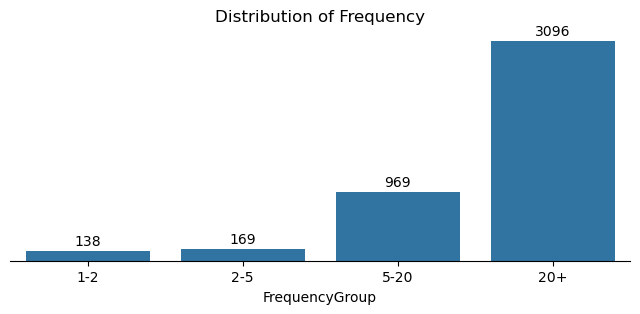

In [ ]:
# Distribution of Frequency
binsF = [0, 2, 5, 20, np.inf]
labelsF = ['1-2', '2-5', '5-20', '20+']
RFM_transactions['FrequencyGroup'] = pd.cut(RFM_transactions['Frequency'], bins=binsF, labels=labelsF)
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(x='FrequencyGroup', data=RFM_transactions, ax=ax)
ax.set_title('Distribution of Frequency')
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Visualize the distribution of Frequency
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.show()

Data Analysis:
-Group 1-2 times (138 customers):
This is the group with the lowest number of customers.
These may be customers who made trial purchases or did not return after their first purchase.

-Group 2-5 times (169 customers):
The number of customers increases slightly compared to the 1-2 times group.
This group may consist of potential customers who are not yet loyal or regular.

-Group 5-20 times (969 customers):
This is the second-largest group, accounting for a significant proportion.
Customers in this group have relatively high purchase frequency and can be considered loyal customers or those with increasing frequency trends.

-Group 20+ times (3,096 customers):
This is the largest group, dominating the distribution.
Customers in this group are considered loyal or bring the highest value to the business.

Summary:
-The business has a large number of regular customers (20+ group) with very high purchase frequency, which is a positive sign. However, the number of customers in the 1-2 and 2-5 times groups is quite low. The business should consider strategies to convert customers with lower frequency (groups 1-2 and 2-5) into higher frequency groups (5-20 and 20+).
-Can implement promotional programs, customer care, or special offers to encourage more frequent shopping.

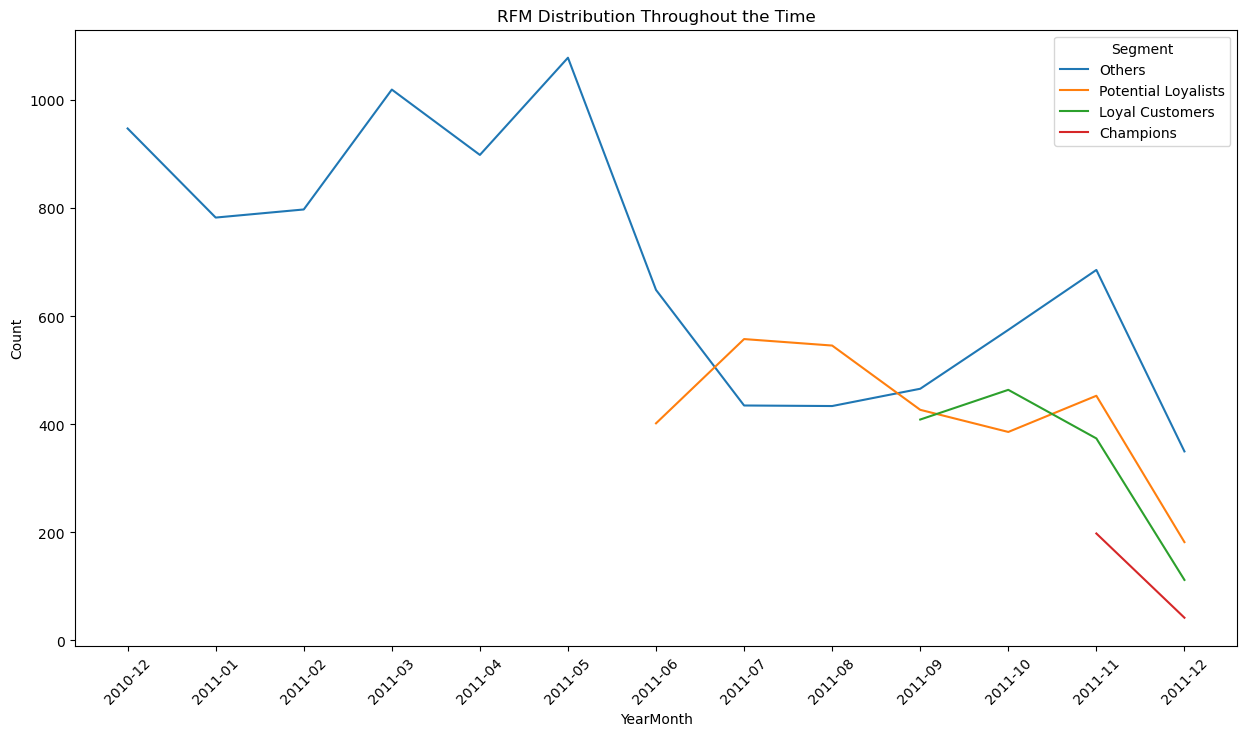

In [ ]:
# Distribution throughout the time 
transactions['YearMonth'] = transactions['InvoiceDate'].dt.to_period('M')
rfm_time = transactions.groupby(['YearMonth', 'CustomerID']).agg({
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'cost': 'sum'
}).reset_index()

rfm_time.columns = ['YearMonth', 'CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_time['Recency'] = (last_day - rfm_time['Recency']).dt.days

# Define the rfm_segment function
def rfm_segment(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 10 and row['Monetary'] >= 1000:
        return 'Champions'
    elif row['Recency'] <= 90 and row['Frequency'] >= 5 and row['Monetary'] >= 500:
        return 'Loyal Customers'
    elif row['Recency'] <= 180 and row['Frequency'] >= 3 and row['Monetary'] >= 300:
        return 'Potential Loyalists'
    else:
        return 'Others'

# Customer segmentation over time
rfm_time['Segment'] = rfm_time.apply(rfm_segment, axis=1)

# Calculate the number of customers in each segment over time
rfm_distribution = rfm_time.groupby(['YearMonth', 'Segment']).size().reset_index(name='Count')

# Convert YearMonth to string for plotting
rfm_distribution['YearMonth'] = rfm_distribution['YearMonth'].astype(str)

# Visualize the distribution of RFM segments over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=rfm_distribution, x='YearMonth', y='Count', hue='Segment')
plt.title('RFM Distribution Throughout the Time')
plt.xticks(rotation=45)
plt.show()


Data Analysis:
-Others Group (Blue):
Largest group in early 2011, but customer numbers decreased significantly from mid-2011.
Peak occurred around January 2011, then sharply declined approaching 0 by year-end.

-Potential Loyalists Group (Orange):
Started increasing from June 2011, showing successful conversion of "Others" into potentially loyal customers.
However, numbers declined from October 2011 to year-end.

-Loyal Customers Group (Green):
Emerged clearly from mid-2011 with slight growth from July 2011 to October 2011.
Subsequently, loyal customer numbers decreased towards year-end, indicating need for retention measures.

-Champions Group (Red):
Latest to emerge, from October 2011, but showed slight decline in following months.
This is a crucial customer group, but relatively small in size, highlighting need for retention and development focus.

Summary:
-Graph shows customer migration from "Others" to higher-value groups like "Potential Loyalists", "Loyal Customers", and "Champions". However, from October 2011 onwards, all customer groups showed declining trends, especially the "Others" group.
-Business needs to focus on improving customer retention strategies, particularly for "Champions" and "Loyal Customers" groups, as these provide the highest value.